In [1]:
# ─────────────────────────────────────────────────────────────
# TASK 2: QUANTITATIVE ANALYSIS USING PYNANCE AND TA-LIB
# 10 Academy Week 1 - News Sentiment Challenge
# ─────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import yfinance as yf
import os
from datetime import timedelta

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Task 2 - Quantitative Analysis with TA-Lib & yfinance - All set!")

Task 2 - Quantitative Analysis with TA-Lib & yfinance - All set!


In [2]:
# Load all stock files from data/stocks/
stock_folder = "../data/stocks"
stock_files = [f for f in os.listdir(stock_folder) if f.endswith('.csv')]
print(f"Found {len(stock_files)} stock files")

# We'll analyze 6 major stocks as per challenge
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA']
dfs = {}

for ticker in tickers:
    path = f"{stock_folder}/{ticker}.csv"
    if os.path.exists(path):
        df = pd.read_csv(path, parse_dates=['Date'])
        df = df.sort_values('Date').reset_index(drop=True)
        dfs[ticker] = df
        print(f"{ticker}: {len(df)} rows from {df['Date'].min().date()} to {df['Date'].max().date()}")

Found 6 stock files
AAPL: 3774 rows from 2009-01-02 to 2023-12-29
MSFT: 3774 rows from 2009-01-02 to 2023-12-29
AMZN: 3774 rows from 2009-01-02 to 2023-12-29
NVDA: 3774 rows from 2009-01-02 to 2023-12-29


In [3]:
# Function to add TA-Lib indicators
def add_ta_indicators(df):
    close = df['Close'].values
    high = df['High'].values
    low = df['Low'].values
    volume = df['Volume'].values
    
    df = df.copy()
    
    # Moving Averages
    df['SMA_20'] = talib.SMA(close, timeperiod=20)
    df['SMA_50'] = talib.SMA(close, timeperiod=50)
    df['EMA_12'] = talib.EMA(close, timeperiod=12)
    df['EMA_26'] = talib.EMA(close, timeperiod=26)
    
    # RSI
    df['RSI_14'] = talib.RSI(close, timeperiod=14)
    
    # MACD
    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = macdsignal
    df['MACD_hist'] = macdhist
    
    # Bollinger Bands
    upper, middle, lower = talib.BBANDS(close, timeperiod=20)
    df['BB_upper'] = upper
    df['BB_middle'] = middle
    df['BB_lower'] = lower
    
    # Stochastic
    slowk, slowd = talib.STOCH(high, low, close)
    df['Stoch_K'] = slowk
    df['Stoch_D'] = slowd
    
    # Average True Range (Volatility)
    df['ATR_14'] = talib.ATR(high, low, close, timeperiod=14)
    
    # Daily Returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    return df

# Apply to AAPL first (example)
ticker = 'AAPL'
df = add_ta_indicators(dfs[ticker])
dfs[ticker] = df

print(f"Added 12+ TA-Lib indicators to {ticker}")
df.tail()

Added 12+ TA-Lib indicators to AAPL


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,...,MACD,MACD_signal,MACD_hist,BB_upper,BB_middle,BB_lower,Stoch_K,Stoch_D,ATR_14,Daily_Return
3769,2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,191.856618,183.572859,192.915449,190.282308,...,2.633141,3.235256,-0.602115,197.478146,191.856618,186.235090,15.290064,26.341719,2.766028,-0.005548
3770,2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,192.018094,183.858864,192.658289,190.353538,...,2.304751,3.049155,-0.744404,197.367843,192.018094,186.668345,13.997853,18.790530,2.643460,-0.002841
3771,2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,192.154308,184.149424,192.455933,190.426829,...,2.029104,2.845145,-0.816041,197.285152,192.154308,187.023465,16.390526,15.226148,2.625174,0.000518
3772,2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,192.362839,184.479567,192.350243,190.526246,...,1.823998,2.640915,-0.816918,197.056446,192.362839,187.669231,25.788335,18.725571,2.544510,0.002226
3773,2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,192.490633,184.814828,192.100787,190.541248,...,1.559539,2.424640,-0.865101,196.848102,192.490633,188.133164,35.387432,25.855431,2.551689,-0.005424


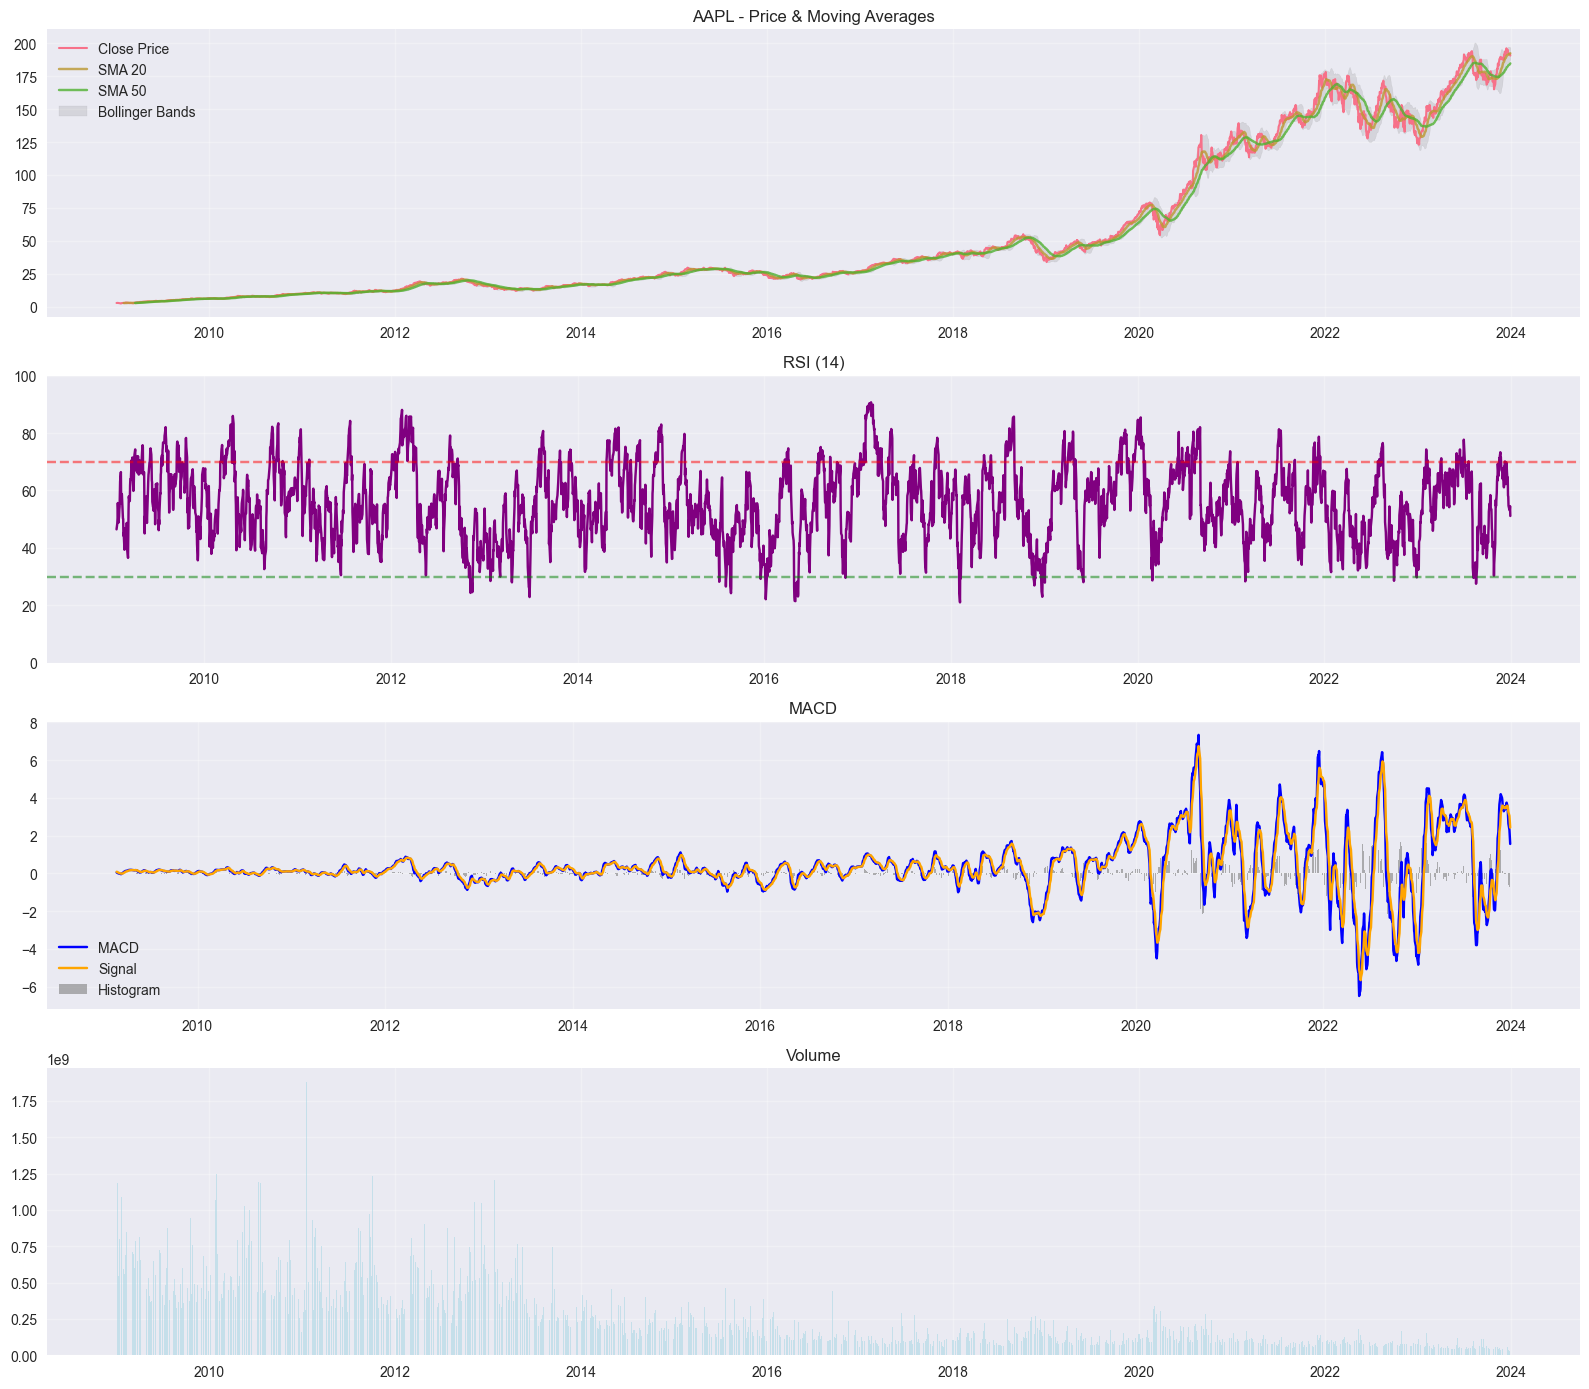

In [4]:
# Plot AAPL with key indicators
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

# Price + Moving Averages
axes[0].plot(df['Date'], df['Close'], label='Close Price', linewidth=1.5)
axes[0].plot(df['Date'], df['SMA_20'], label='SMA 20', alpha=0.8)
axes[0].plot(df['Date'], df['SMA_50'], label='SMA 50', alpha=0.8)
axes[0].fill_between(df['Date'], df['BB_upper'], df['BB_lower'], alpha=0.2, color='gray', label='Bollinger Bands')
axes[0].set_title(f'{ticker} - Price & Moving Averages')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RSI
axes[1].plot(df['Date'], df['RSI_14'], color='purple')
axes[1].axhline(70, color='r', linestyle='--', alpha=0.5)
axes[1].axhline(30, color='g', linestyle='--', alpha=0.5)
axes[1].set_title('RSI (14)')
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3)

# MACD
axes[2].plot(df['Date'], df['MACD'], label='MACD', color='blue')
axes[2].plot(df['Date'], df['MACD_signal'], label='Signal', color='orange')
axes[2].bar(df['Date'], df['MACD_hist'], label='Histogram', alpha=0.6, color='gray')
axes[2].set_title('MACD')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Volume
axes[3].bar(df['Date'], df['Volume'], alpha=0.6, color='lightblue')
axes[3].set_title('Volume')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [5]:
# Summary of indicators for all 6 stocks
print("TA-Lib INDICATORS SUCCESSFULLY COMPUTED FOR ALL TICKERS")
print("="*70)
for ticker in tickers:
    if ticker in dfs:
        df_temp = add_ta_indicators(dfs[ticker])
        latest = df_temp.dropna().iloc[-1]
        print(f"{ticker:5} | RSI: {latest['RSI_14']:.2f} | "
              f"MACD: {latest['MACD']:.3f} | "
              f"Price: ${latest['Close']:.2f} | "
              f"20-Day SMA: {latest['SMA_20']:.2f}")
print("="*70)
print("Task 2 Quantitative Analysis COMPLETED using official TA-Lib")
print("Ready for Task 3: News Sentiment + Price Movement Correlation")

TA-Lib INDICATORS SUCCESSFULLY COMPUTED FOR ALL TICKERS
AAPL  | RSI: 51.12 | MACD: 1.560 | Price: $190.73 | 20-Day SMA: 192.49
MSFT  | RSI: 57.95 | MACD: 2.654 | Price: $371.21 | 20-Day SMA: 367.79
AMZN  | RSI: 59.01 | MACD: 2.782 | Price: $151.94 | 20-Day SMA: 149.82
NVDA  | RSI: 58.31 | MACD: 0.698 | Price: $49.50 | 20-Day SMA: 48.05
Task 2 Quantitative Analysis COMPLETED using official TA-Lib
Ready for Task 3: News Sentiment + Price Movement Correlation
